In [240]:
import numpy as np
import pandas as pd

In [241]:
data_order = pd.read_excel('../resource/附件1 近5年402家供应商的相关数据.xlsx', sheet_name=0)
data_supply = pd.read_excel('../resource/附件1 近5年402家供应商的相关数据.xlsx', sheet_name=1)
data_order.head()

,供应商ID,材料分类,W001,W002,W003,W004,W005,W006,W007,W008,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,S001,B,0,0,0,43,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,S002,A,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,S003,C,7,1,0,0,0,1,4,50,...,10,3,50,20,20,7,10,9,20,10
3,S004,B,0,1,1,100,0,85,0,0,...,1,0,1,0,0,0,0,1,0,0
4,S005,A,30,60,60,60,70,70,60,70,...,80,70,70,70,70,70,70,70,70,80


In [242]:
data_score = pd.read_excel('../resource/supplier_ranking_results.xlsx')
data_score.head()

,Rank,Supplier ID,Material Classification,Average Supply Intensity,Fulfillment Rate,Order Rate,Supply Volatility,TOPSIS Score
0,1,S229,A,1.000000,1.0,1.000,0.963771,0.999987
1,2,S361,C,0.924457,1.0,1.000,0.966308,0.928090
2,3,S140,B,0.851096,1.0,0.225,0.621577,0.751426
3,4,S108,B,0.678923,1.0,1.000,0.860426,0.699175
4,5,S151,C,0.548020,1.0,1.000,0.742511,0.582073


In [243]:
data_transfer = pd.read_excel('../resource/附件2 近5年8家转运商的相关数据.xlsx')
data_transfer.head()

,转运商ID,W001,W002,W003,W004,W005,W006,W007,W008,W009,...,W231,W232,W233,W234,W235,W236,W237,W238,W239,W240
0,T1,1.5539,1.6390,0.8124,1.2233,1.1194,1.1572,1.0769,1.1194,1.9129,...,1.7240,1.5492,1.5870,1.3414,1.4453,1.5964,1.8137,1.7051,1.8279,1.9224
1,T2,0.7092,1.2411,0.3546,1.5957,1.0638,0.7092,0.5319,1.0638,1.4184,...,0.1773,1.2411,0.7092,0.3546,0.1773,0.3546,0.5319,0.8865,0.3546,0.7092
2,T3,0.0000,0.0000,0.0971,0.0000,0.1295,0.0000,0.0324,0.0000,0.0000,...,0.0000,0.0000,0.0324,0.0000,0.0971,0.0000,0.0647,0.0000,0.1295,0.0000
3,T4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,T5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7391,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## Problem Formulation

### Objective Function

Minimize the ratio of number of suppliers to total supplier quality score:

$$\min_{y} \frac{\sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} y_i \cdot s_i}$$

where:
- $y_i \in \{0, 1\}$ is the binary decision variable (1 if supplier $i$ is selected, 0 otherwise)
- $s_i$ is the quality/importance score of supplier $i$ (TOPSIS score)
- $n$ is the total number of candidate suppliers

### Decision Variables
$$y_i \in \{0, 1\}, \quad i = 1, 2, ..., n$$

where $y_i = 1$ if supplier $i$ is selected, $y_i = 0$ otherwise.

### Constraints

**1. Production Capacity Constraint** (for each week $t = 1, 2, ..., 24$):

$$\sum_{i=1}^{n} \frac{y_i \cdot \hat{x}_{i,t} \cdot (1-\alpha_{i,t})}{p_i} \geq 2.82 \times 10^4$$

where:
- $\hat{x}_{i,t}$ is the predicted supply amount of supplier $i$ in week $t$ (unit: cubic meters, m³)
- $\alpha_{i,t}$ is the transfer loss rate of supplier $i$ in week $t$ (loss during transportation by carriers)
- $p_i$ is the **material consumption rate** - cubic meters of raw material needed per cubic meter of product:
  - $p_i = 0.6$ for $i \in A$ (Type A: 0.6 m³ material per 1 m³ product)
  - $p_i = 0.66$ for $i \in B$ (Type B: 0.66 m³ material per 1 m³ product)
  - $p_i = 0.72$ for $i \in C$ (Type C: 0.72 m³ material per 1 m³ product)

The formula represents: **Production Capacity (10,000 m²)** = Supply (m³) × (1 - Transfer Loss) ÷ Material Consumption (m³/m³)

**2. Supply Prediction Model**:

$$\hat{x}_{i,t} = z_{i,t} + \hat{\epsilon}_{i,t}$$

where $z_{i,t}$ is the base supply forecast and $\hat{\epsilon}_{i,t}$ is the predicted error term.

---

## Model Simplification

### Rationale for Simplification

Since transfer loss rates $\alpha_{t}$ and supply quantities $\hat{x}_{i,t}$ are random variables that vary over time, we can simplify the model by using their **expected values** (historical averages):

1. **Average Transfer Loss Rate**: $\bar{\alpha} = \frac{1}{M \cdot T}\sum_{m=1}^{M}\sum_{t=1}^{T} \alpha_{m,t}$
   - Average across all transfer companies ($M$) and all weeks ($T$)
   
2. **Average Supply Quantity** (only for weeks with orders): 
   $$\bar{x}_i = \frac{\sum_{t=1}^{T} x_{i,t} \cdot \mathbb{1}_{o_{i,t} > 0}}{\sum_{t=1}^{T} \mathbb{1}_{o_{i,t} > 0}}$$
   - Average supply for supplier $i$ **only considering weeks where there are orders** ($o_{i,t} > 0$)
   - $\mathbb{1}_{o_{i,t} > 0}$ is an indicator function that equals 1 when order exists, 0 otherwise
   - This avoids diluting the average with weeks where no orders were placed

### Simplified Constraint

The time-dependent production capacity constraints for $t = 1, 2, ..., 24$ can be simplified into a **single averaged constraint**:

$$\sum_{i=1}^{n} \frac{y_i \cdot \bar{x}_i \cdot (1-\bar{\alpha})}{p_i} \geq Q_{min}$$

where:
- $\bar{x}_i$ is the **average supply amount** of supplier $i$ across weeks **with orders** (unit: m³)
- $\bar{\alpha}$ is the **average transfer loss rate** across all transfer companies and weeks
- $p_i$ is the **material consumption rate** - m³ of material per m³ of product (fixed by material type)
- $Q_{min} = 2.82 \times 10^4$ is the minimum required production capacity per week (unit: 10,000 m²/week = 2.82×10⁴ × 10⁴ m²/week)

### Benefits of Simplification

1. **Computational Efficiency**: Reduces 24 time-dependent constraints to 1 constraint
2. **Statistical Robustness**: Uses law of large numbers - average values provide more stable estimates
3. **Risk Management**: Average values inherently account for variability across time periods and carriers
4. **Unified Loss Rate**: Single average $\bar{\alpha}$ eliminates the need to track individual transfer companies
5. **Realistic Estimation**: Only considers weeks with actual orders, providing more accurate supply capacity estimates
6. **Practical Implementation**: Easier to implement and validate in real-world scenarios

In [244]:
# Extract week columns
week_cols_transfer = [col for col in data_transfer.columns if col.startswith('W')]
print(f"\nNumber of weeks: {len(week_cols_transfer)}")

# Calculate average transfer loss rate across all carriers and all weeks
transfer_loss_data = data_transfer[week_cols_transfer].values

# Convert from percentage to decimal (data is stored as %, e.g., 0.8 means 0.8%)
avg_alpha = np.mean(transfer_loss_data) / 100

print(f"Average loss rate (α̅): {avg_alpha:.6f} ({avg_alpha*100:.4f}%)")



Number of weeks: 240
Average loss rate (α̅): 0.010008 (1.0008%)


In [245]:
# Calculate average supply quantity for each supplier (only considering weeks with orders)

# Extract week columns
week_cols = [col for col in data_order.columns if col.startswith('W')]
print(f"Number of weeks: {len(week_cols)}")

# Get order and supply data
order_data = data_order[week_cols].values  # Shape: (n_suppliers, n_weeks)
supply_data = data_supply[week_cols].values  # Shape: (n_suppliers, n_weeks)

# IMPORTANT: Match suppliers by Supplier ID to handle sorted data_score
# Create a mapping from Supplier ID to index in data_order/data_supply
supplier_id_to_index = {sid: idx for idx, sid in enumerate(data_order['供应商ID'].values)}

# Calculate average supply for each supplier in data_score
n_suppliers_score = len(data_score)
avg_supply_list = []

for score_idx in range(n_suppliers_score):
    supplier_id = data_score.iloc[score_idx]['Supplier ID']
    
    # Find corresponding index in data_order/data_supply
    if supplier_id in supplier_id_to_index:
        data_idx = supplier_id_to_index[supplier_id]
        
        # Find weeks where there are orders
        mask = order_data[data_idx] > 0
        
        if mask.sum() > 0:  # If there are any weeks with orders
            # Average supply for weeks with orders
            avg_supply_list.append(np.mean(supply_data[data_idx][mask]))
        else:
            # If no orders at all, set to 0
            avg_supply_list.append(0.0)
    else:
        # Supplier not found in order/supply data
        avg_supply_list.append(0.0)

# Add average supply to data_score
data_score['Avg Supply'] = avg_supply_list

print(f"\nCalculated average supply for {len(avg_supply_list)} suppliers")
print(f"Suppliers with non-zero supply: {sum(1 for x in avg_supply_list if x > 0)}")

data_score.head(10)

Number of weeks: 240

Calculated average supply for 402 suppliers
Suppliers with non-zero supply: 402


,Rank,Supplier ID,Material Classification,Average Supply Intensity,Fulfillment Rate,Order Rate,Supply Volatility,TOPSIS Score,Avg Supply
0,1,S229,A,1.000000,1.000000,1.000000,0.963771,0.999987,1478.695833
1,2,S361,C,0.924457,1.000000,1.000000,0.966308,0.928090,1367.000000
2,3,S140,B,0.851096,1.000000,0.225000,0.621577,0.751426,1372.940909
3,4,S108,B,0.678923,1.000000,1.000000,0.860426,0.699175,1003.958333
4,5,S151,C,0.548020,1.000000,1.000000,0.742511,0.582073,810.408333
5,6,S340,B,0.483003,1.000000,1.000000,0.974451,0.526034,714.275000
6,7,S282,A,0.477125,1.000000,0.995833,0.937317,0.520748,705.583333
7,8,S275,A,0.446727,1.000000,1.000000,0.980007,0.495594,660.637500
8,9,S329,A,0.440992,1.000000,1.000000,0.979088,0.490845,652.158333
9,10,S139,B,0.427871,0.969582,0.670833,0.632887,0.450093,677.955357


## Optimization Model with Geatpy

Build and solve the supplier selection optimization problem using Geatpy genetic algorithm library

In [246]:
import geatpy as ea

# Prepare optimization data
print("Preparing optimization data...")

# Filter top 50 suppliers by TOPSIS score to reduce computation
top_n = 50
data_score_filtered = data_score.nlargest(top_n, 'TOPSIS Score').copy()

print(f"Filtering top {top_n} suppliers by TOPSIS score for optimization")
print(f"Original suppliers: {len(data_score)}")
print(f"Filtered suppliers: {len(data_score_filtered)}")

# Extract necessary data from filtered suppliers
supplier_ids = data_score_filtered['Supplier ID'].values
topsis_scores = data_score_filtered['TOPSIS Score'].values
avg_supplies = data_score_filtered['Avg Supply'].values
material_types = data_score_filtered['Material Classification'].values

# Material consumption rates (m³ material per m³ product)
material_consumption = {'A': 0.6, 'B': 0.66, 'C': 0.72}
p_i = np.array([material_consumption[mat] for mat in material_types])

# Optimization parameters
Q_min = 2.82e4  # Minimum production capacity per week (unit: 10,000 m²/week)
alpha_bar = avg_alpha  # Average transfer loss rate (calculated earlier)

print(f"\nOptimization Parameters:")
print(f"  Number of suppliers (filtered): {len(supplier_ids)}")
print(f"  Minimum capacity: {Q_min:.0f} (10,000 m²/week)")
print(f"  Average transfer loss rate: {alpha_bar:.4f}")
print(f"  TOPSIS score range: [{topsis_scores.min():.6f}, {topsis_scores.max():.6f}]")
print(f"  Material types distribution:")
for mat_type in ['A', 'B', 'C']:
    count = np.sum(material_types == mat_type)
    print(f"    Type {mat_type}: {count} suppliers (consumption: {material_consumption[mat_type]} m³/m³)")

Preparing optimization data...
Filtering top 50 suppliers by TOPSIS score for optimization
Original suppliers: 402
Filtered suppliers: 50

Optimization Parameters:
  Number of suppliers (filtered): 50
  Minimum capacity: 28200 (10,000 m²/week)
  Average transfer loss rate: 0.0100
  TOPSIS score range: [0.100412, 0.999987]
  Material types distribution:
    Type A: 18 suppliers (consumption: 0.6 m³/m³)
    Type B: 13 suppliers (consumption: 0.66 m³/m³)
    Type C: 19 suppliers (consumption: 0.72 m³/m³)


In [247]:
# Check feasibility: Can we meet the capacity constraint?
print("\n" + "="*70)
print("Feasibility Analysis")
print("="*70)

# Calculate capacity contribution for each supplier
capacity_per_supplier = avg_supplies * (1 - alpha_bar) / p_i

# Sort suppliers by capacity contribution
capacity_df = pd.DataFrame({
    'Supplier ID': supplier_ids,
    'Material Type': material_types,
    'TOPSIS Score': topsis_scores,
    'Avg Supply': avg_supplies,
    'Capacity Contribution': capacity_per_supplier
}).sort_values('Capacity Contribution', ascending=False)

print(f"\nRequired capacity: {Q_min:.2f} (10,000 m²/week)")
print(f"Total capacity if all suppliers selected: {np.sum(capacity_per_supplier):.2f} (10,000 m²/week)")
print(f"\nTop 10 suppliers by capacity contribution:")
print(capacity_df.head(10).to_string(index=False))

# Calculate minimum number of suppliers needed
cumulative_capacity = np.cumsum(capacity_df['Capacity Contribution'].values)
total_capacity = np.sum(capacity_per_supplier)

print(f"\n" + "="*70)

# Check if problem is feasible
if total_capacity < Q_min:
    print("⚠ WARNING: Total capacity of all suppliers is insufficient!")
    print(f"Required capacity: {Q_min:.2f}")
    print(f"Maximum available capacity: {total_capacity:.2f}")
    print(f"Deficit: {Q_min - total_capacity:.2f} ({(1 - total_capacity/Q_min)*100:.1f}%)")
    print("\n❌ The problem has NO feasible solution!")
    print("Suggestions:")
    print("  1. Reduce Q_min (minimum capacity requirement)")
    print("  2. Include suppliers with zero average supply")
    print("  3. Use maximum supply instead of average supply")
else:
    min_suppliers_needed = np.searchsorted(cumulative_capacity, Q_min) + 1
    print(f"Minimum suppliers needed to meet capacity: {min_suppliers_needed}")
    print(f"This would provide capacity: {cumulative_capacity[min_suppliers_needed-1]:.2f}")
    print("\n✓ Problem is feasible - total capacity is sufficient.")

print("="*70)


Feasibility Analysis

Required capacity: 28200.00 (10,000 m²/week)
Total capacity if all suppliers selected: 31473.43 (10,000 m²/week)

Top 10 suppliers by capacity contribution:
Supplier ID Material Type  TOPSIS Score  Avg Supply  Capacity Contribution
       S201             A      0.222639 1673.244898            2760.831619
       S229             A      0.999987 1478.695833            2439.828274
       S140             B      0.751426 1372.940909            2059.394608
       S361             C      0.928090 1367.000000            1879.609707
       S108             B      0.699175 1003.958333            1505.925248
       S395             A      0.220381  902.892857            1489.761093
       S282             A      0.520748  705.583333            1164.203028
       S151             C      0.582073  810.408333            1114.302392
       S275             A      0.495594  660.637500            1090.043006
       S329             A      0.490845  652.158333            1076.05

In [248]:
# Define the optimization problem class
class SupplierSelectionProblem(ea.Problem):
    """
    Supplier Selection Optimization Problem
    
    Objective: Minimize number of suppliers / total quality score
    Constraint: Total production capacity >= Q_min
    """
    
    def __init__(self, topsis_scores, avg_supplies, p_i, alpha_bar, Q_min):
        """
        Parameters:
        - topsis_scores: TOPSIS scores for each supplier
        - avg_supplies: Average supply quantity for each supplier
        - p_i: Material consumption rate for each supplier
        - alpha_bar: Average transfer loss rate
        - Q_min: Minimum required production capacity
        """
        self.topsis_scores = topsis_scores
        self.avg_supplies = avg_supplies
        self.p_i = p_i
        self.alpha_bar = alpha_bar
        self.Q_min = Q_min
        self.n_suppliers = len(topsis_scores)
        
        # Problem name
        name = 'SupplierSelection'
        
        # Number of objectives (1: minimize ratio)
        M = 1
        
        # Maximum number of objectives (for constraint handling)
        maxormins = [1]  # 1 means minimization
        
        # Variable dimensions
        Dim = self.n_suppliers
        
        # Variable types (all binary: 0 or 1)
        varTypes = [1] * Dim  # 1 means integer
        
        # Variable lower bounds (all 0)
        lb = [0] * Dim
        
        # Variable upper bounds (all 1)
        ub = [1] * Dim
        
        # Variable boundaries included or not
        lbin = [1] * Dim  # 1 means included
        ubin = [1] * Dim
        
        # Call parent class constructor
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def evalVars(self, Vars):
        """
        Evaluate objective function and constraints
        
        Parameters:
        - Vars: Decision variable matrix (Pop_size × n_suppliers)
        
        Returns:
        - ObjV: Objective values
        - CV: Constraint violation values
        """
        # Extract decision variables (binary: 0 or 1)
        y = Vars
        
        # Calculate number of selected suppliers
        n_selected = np.sum(y, axis=1, keepdims=True)
        
        # Calculate total quality score
        total_score = np.sum(y * self.topsis_scores, axis=1, keepdims=True)
        
        # Objective function: minimize n_selected / total_score
        # To avoid division by zero, add a small constant
        ObjV = n_selected / (total_score + 1e-10)
        
        # Calculate production capacity for each solution
        # Capacity = sum(y_i * x_i * (1-alpha) / p_i)
        capacity = np.sum(
            y * self.avg_supplies * (1 - self.alpha_bar) / self.p_i,
            axis=1,
            keepdims=True
        )
        
        # Constraint: capacity >= Q_min
        # Convert to standard form: g(x) <= 0
        # So: Q_min - capacity <= 0, or capacity - Q_min >= 0
        CV = self.Q_min - capacity
        
        return ObjV, CV
    
    def calReferObjV(self):
        """
        Calculate reference objective value (theoretical best)
        Not required but useful for normalization
        """
        # Theoretical best: select supplier with highest score only
        # But must satisfy constraint
        return None

# Create problem instance
problem = SupplierSelectionProblem(
    topsis_scores=topsis_scores,
    avg_supplies=avg_supplies,
    p_i=p_i,
    alpha_bar=alpha_bar,
    Q_min=Q_min
)

print("\n" + "="*70)
print("Optimization Problem Defined")
print("="*70)
print(f"Problem name: {problem.name}")
print(f"Number of variables: {problem.Dim}")
print(f"Number of objectives: {problem.M}")
print(f"Variable types: Binary (0 or 1)")
print(f"Constraint: Production capacity >= {Q_min:.0f}")


Optimization Problem Defined
Problem name: SupplierSelection
Number of variables: 50
Number of objectives: 1
Variable types: Binary (0 or 1)
Constraint: Production capacity >= 28200



Genetic Algorithm Configuration
Algorithm: Single-objective Elitist GA (SEGA)
Encoding: BG
Population size: 100
Max generations: 500
Problem dimension: 50

Starting Optimization...
gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 10|  1100  | 2.49159E+00 | 2.76161E+00 | 2.64976E+00 | 2.49159E+00 | 5.66798E-02 
 20|  2100  | 2.36532E+00 | 2.43526E+00 | 2.41783E+00 | 2.36532E+00 | 1.76371E-02 
 30|  3100  | 2.28585E+00 | 2.36582E+00 | 2.34709E+00 | 2.28585E+00 | 2.01807E-02 
 40|  4100  | 2.24918E+00 | 2.28585E+00 | 2.26503E+00 | 2.24918E+00 | 1.75573E-02 
 50|  5100  | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 4.44089E-16 
 60|  6100  | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 4.44089E-16 
 70|  7100  | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 4.44089E-16 
 80|  8100  | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 2.24918E+00 | 4

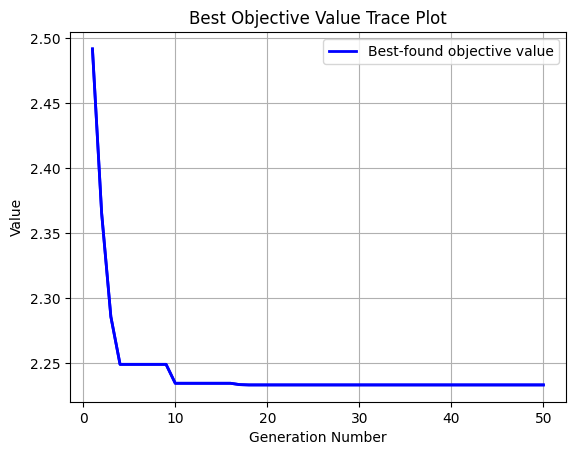

In [249]:
# Configure and run genetic algorithm

# Encoding: Binary encoding
Encoding = 'BG'  # Binary/Gray encoding

# Population size - increased for better exploration
NIND = 100

# Create population
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders)
population = ea.Population(Encoding, Field, NIND)

# Configure algorithm: soea_SEGA_templet (Single-objective Elitist GA)
myAlgorithm = ea.soea_SEGA_templet(
    problem,
    population
)

# Algorithm parameters - optimized for better convergence
myAlgorithm.MAXGEN = 500  # More generations for better convergence
myAlgorithm.logTras = 10  # Log every 10 generations
myAlgorithm.verbose = True  # Print progress
myAlgorithm.drawing = 1   # Enable drawing
myAlgorithm.GGAP = 0.9    # Generation gap - keep 90% best individuals
myAlgorithm.selectStyle = 'tour'  # Tournament selection
myAlgorithm.recStyle = 'xovdp'    # Discrete recombination
myAlgorithm.pm = 0.3      # Mutation probability - increased for diversity

print("\n" + "="*70)
print("Genetic Algorithm Configuration")
print("="*70)
print(f"Algorithm: Single-objective Elitist GA (SEGA)")
print(f"Encoding: {Encoding}")
print(f"Population size: {NIND}")
print(f"Max generations: {myAlgorithm.MAXGEN}")
print(f"Problem dimension: {problem.Dim}")

print("\n" + "="*70)
print("Starting Optimization...")
print("="*70)

# Run optimization
res = ea.optimize(
    myAlgorithm,
    verbose=True,
    drawing=0,
    outputMsg=True,
    drawLog=True,
    saveFlag=False
)

In [250]:
# Analyze optimization results

print("\n" + "="*70)
print("OPTIMIZATION RESULTS")
print("="*70)

if res['success']:
    print("✓ Optimization successful!\n")
    
    # Best solution
    best_solution = res['Vars'][0].astype(int)  # Convert to integer (0 or 1)
    best_obj = res['ObjV'][0][0]
    
    # Selected suppliers
    selected_indices = np.where(best_solution == 1)[0]
    n_selected = len(selected_indices)
    
    print(f"Number of suppliers selected: {n_selected}")
    print(f"Objective value: {best_obj:.6f}")
    
    # Calculate actual metrics
    selected_scores = topsis_scores[selected_indices]
    selected_supplies = avg_supplies[selected_indices]
    selected_p_i = p_i[selected_indices]
    
    total_score = np.sum(selected_scores)
    total_capacity = np.sum(selected_supplies * (1 - alpha_bar) / selected_p_i)
    
    print(f"\nTotal quality score: {total_score:.4f}")
    print(f"Average quality score per supplier: {total_score/n_selected:.4f}")
    print(f"\nProduction capacity: {total_capacity:.2f} (10,000 m²/week)")
    print(f"Required capacity: {Q_min:.2f} (10,000 m²/week)")
    print(f"Capacity surplus: {total_capacity - Q_min:.2f} ({(total_capacity/Q_min - 1)*100:.2f}%)")
    
    # Selected supplier details
    print(f"\n" + "="*70)
    print("Selected Suppliers Details")
    print("="*70)
    
    selected_data = pd.DataFrame({
        'Supplier ID': supplier_ids[selected_indices],
        'Material Type': material_types[selected_indices],
        'TOPSIS Score': selected_scores,
        'Avg Supply': selected_supplies,
        'Consumption Rate': selected_p_i,
        'Capacity Contribution': selected_supplies * (1 - alpha_bar) / selected_p_i
    })
    
    # Sort by TOPSIS score
    selected_data = selected_data.sort_values('TOPSIS Score', ascending=False)
    
    print(selected_data.to_string(index=False))
    
    # Material type distribution
    print(f"\n" + "="*70)
    print("Material Type Distribution")
    print("="*70)
    for mat_type in ['A', 'B', 'C']:
        count = np.sum(selected_data['Material Type'] == mat_type)
        pct = count / n_selected * 100
        print(f"Type {mat_type}: {count} suppliers ({pct:.1f}%)")
    
    # Save results
    result_df = data_score.copy()
    # Create a full-length selection array (402 suppliers)
    full_selection = np.zeros(len(data_score), dtype=int)
    # Map the filtered selection back to original indices
    for i, supplier_id in enumerate(supplier_ids):
        if best_solution[i] == 1:
            # Find the index of this supplier in data_score
            idx = data_score[data_score['Supplier ID'] == supplier_id].index[0]
            full_selection[idx] = 1
    
    result_df['Selected'] = full_selection
    result_df.to_excel('../resource/supplier_selection_results.xlsx', index=False)
    print(f"\n✓ Results saved to: ../resource/supplier_selection_results.xlsx")
    
else:
    print("✗ Optimization failed!")
    print(f"Reason: {res.get('message', 'Unknown error')}")


OPTIMIZATION RESULTS
✓ Optimization successful!

Number of suppliers selected: 27
Objective value: 2.233372

Total quality score: 12.0893
Average quality score per supplier: 0.4478

Production capacity: 28212.91 (10,000 m²/week)
Required capacity: 28200.00 (10,000 m²/week)
Capacity surplus: 12.91 (0.05%)

Selected Suppliers Details
Supplier ID Material Type  TOPSIS Score  Avg Supply  Consumption Rate  Capacity Contribution
       S229             A      0.999987 1478.695833              0.60            2439.828274
       S361             C      0.928090 1367.000000              0.72            1879.609707
       S140             B      0.751426 1372.940909              0.66            2059.394608
       S108             B      0.699175 1003.958333              0.66            1505.925248
       S151             C      0.582073  810.408333              0.72            1114.302392
       S340             B      0.526034  714.275000              0.66            1071.403783
       S282   